In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

!cp /content/drive/MyDrive/Q7/A/proyectoAlgoritmia/generadorKdTree .
!cp /content/drive/MyDrive/Q7/A/proyectoAlgoritmia/queryKdTree  .
!cp -R /content/drive/MyDrive/Q7/A/proyectoAlgoritmia/data .




Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
!chmod +x generadorKdTree
!chmod +x queryKdTree


In [ ]:
!time ./generadorKdTree 2 2 100 5 > outputGenerator.txt
!echo "Resultados:"
!time ./queryKdTree STANDART < outputGenerator.txt > results.txt
!cat outputGenerator.txt | head -n10


real	0m0.003s
user	0m0.001s
sys	0m0.002s
Resultados:

real	0m0.007s
user	0m0.005s
sys	0m0.002s
2
100 2 5
0.790413 0.073636 
0.031082 0.187058 
0.114789 0.375960 
0.619633 0.996052 
0.064593 0.409114 
0.210833 0.655576 
0.368728 0.790225 
0.858750 0.815002 


In [ ]:
import plotly.graph_objects as go

def read_trees_from_file(filename):
    trees = []
    with open(filename, 'r') as file:
        num_trees = int(file.readline().strip())
        for _ in range(num_trees):
            line = file.readline().strip()
            if not line:
                continue
            try:
                num_nodes, dimensionality, num_queries = map(int, line.split()[:3])
                queries = [list(map(float, file.readline().split())) for _ in range(num_queries)]
            except ValueError:
                print(f"Error while reading tree details: {line}")
                continue

            components = []
            for _ in range(num_nodes):
                comp_line = file.readline().strip()
                if not comp_line:
                    print(f"Error while reading components for tree with {num_nodes} nodes and {dimensionality} dimensions.")
                    break
                components.append(list(map(float, comp_line.split())))

            trees.append((dimensionality, components, queries))
    return trees

def plot_trees(trees):
    traces = []

    for i, (dimensionality, components, queries) in enumerate(trees, 1):
        if dimensionality == 2:
            x_vals = [comp[0] for comp in components]
            y_vals = [comp[1] for comp in components]
            traces.append(go.Scatter(x=x_vals, y=y_vals, mode='markers', name=f'Tree {i}'))

            # Plotting queries
            query_x_vals = [query[0] for query in queries]
            query_y_vals = [query[1] for query in queries]
            traces.append(go.Scatter(x=query_x_vals, y=query_y_vals, mode='markers', marker=dict(color='red'), name='Queries'))

    layout = go.Layout(title="2D representation of k-dimensional trees with Queries",
                       xaxis=dict(title="X-axis", scaleanchor="y"),
                       yaxis=dict(title="Y-axis"),
                       width=600, height=600)

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

# Read and plot directly from "outputGenerator.txt"
filename = "outputGenerator.txt"
trees = read_trees_from_file(filename)
plot_trees(trees)


In [ ]:
import subprocess

def call_generadorKdTree(num_arboles, dimension, num_nodos, num_consultas):
    cmd = ['./generadorKdTree', str(num_arboles), str(dimension), str(num_nodos), str(num_consultas)]
    result = subprocess.run(cmd, text=True, capture_output=True)
    return result.stdout

def main():
    num_arboles = 1000
    Q = 100
    j_values = range(11, 12)  # Esto generará nodos: 16, 32, 64,..., 1024

    with open('output.txt', 'w') as file:
      for k in range(1, 2):
        for j in j_values:
            num_nodos = 2**j
            output = call_generadorKdTree(num_arboles, k, num_nodos, Q)
            file.write(output)
            # Puedes procesar 'output' o guardarlo según sea necesario

if __name__ == '__main__':
    main()


In [ ]:
# Generador
!./generadorKdTree 1000 6 1024 90 > kdTree_A1000_K6_N1024_Q90.txt

In [ ]:
!time ./queryKdTree RELAX < kdTree_A128_K2_N64_Q100.txt > output.txt



real	0m23.065s
user	0m22.825s
sys	0m0.060s


In [ ]:
!time ./queryParKdTree RELAX < kdTree_A128_K2_N64_Q100.txt > output.txt



real	0m22.593s
user	0m22.148s
sys	0m0.057s


In [2]:
def calculate_mean_from_file(filename):
    with open(filename, 'r') as file:
        # Leer el número de árboles, no se usará en este caso
        num_trees = int(file.readline().strip())
        total_mean = 0
        nodes = []
        for _ in range(num_trees):
          # Leer la dimensión k y el número de consultas
          k, num_queries = map(int, file.readline().split())

          # Contador para acumular el total de nodos explorados
          total_nodes_explored = 0
          # Leer cada línea de consulta y sumar los nodos explorados
          for _ in range(num_queries):
              components = file.readline().split()
              nodes_explored = int(components[-1])  # El último elemento es el número de nodos explorados
              nodes.append(nodes_explored)
              total_nodes_explored += nodes_explored
          mean_nodes_explored = total_nodes_explored / num_queries
          total_mean = total_mean + mean_nodes_explored
          

    return nodes, total_mean/num_trees

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframe(results, method):
    """
    Traza un gráfico de la columna 'Y' en función de la columna 'X' de un DataFrame.
    
    Parameters:
    - df (pd.DataFrame): El DataFrame que contiene las columnas 'X' y 'Y'.
    """
    plt.figure(figsize=(10, 6))

    for k in reversed(range(2, 7)):
        plt.plot(results[k][method]['X'], results[k][method]['Y'], '-o', label ="n^a + log(n) K" + str(k) + " " + method)
    #plt.plot(df2['X'], results2['Y'], '-o', color='blue', label ="n^a + log(n) SQ")
    plt.plot(results[2]['STANDART']['X'], np.log(results[2]['STANDART']['X']), '-o', color='green', label="log(n)")
    plt.xlabel('Tamaño del arbol (X)')
    plt.ylabel('Nodos explorados (Y)')
    plt.title('Kn Plot')
    plt.grid(True)
    plt.legend()  # Muestra la leyenda
    plt.show()
    
def plot_dataframe_log(results, method):
    """
    Traza un gráfico de la columna 'Y' en función de la columna 'X' de un DataFrame.
    
    Parameters:
    - results (pd.DataFrame): El DataFrame que contiene las columnas 'X' y 'Y'.
    """
    plt.figure(figsize=(10, 6))

    for k in reversed(range(2, 7)):
        plt.loglog(results[k][method]['X'], results[k][method]['Y'], '-o', label ="n^a + log(n) K" + str(k) + " " + method)
    #plt.plot(df2['X'], df2['Y'], '-o', color='blue', label ="n^a + log(n) SQ")
    plt.loglog(results[2]['STANDART']['X'], np.log(results[2]['STANDART']['X']), '-o', color='green', label="log(n)")
    plt.xlabel('Tamaño del arbol (X)')
    plt.ylabel('Nodos explorados (Y)')
    plt.title('Kn Plot')
    plt.grid(True)
    plt.legend()  # Muestra la leyenda
    plt.show()



def plot_boxplot_log(nodes):
    fig, axs = plt.subplots(5, 3, figsize=(48, 48))

    for k in range(2, 7):
        for i, method in enumerate(["STANDART", "SQUARISH", "RELAX"]):
            # Recopilar los datos de todos los valores de N en una lista de listas
            data_to_plot = []
            for N in nodes[k][method].keys():
                data_to_plot.append(nodes[k][method][N])

            
            # Boxplot de todos los datos recopilados
            axs[k-2, i].boxplot(data_to_plot)
            
            # Establecer las etiquetas del eje x como los valores de N
            axs[k-2, i].set_xticks(range(1, len(nodes[k][method]) + 1))
            axs[k-2, i].set_xticklabels([str(N) for N in nodes[k][method]])
            
            axs[k-2, i].grid(True)
            axs[k-2, i].set_title('K'+str(k) + " " + method)

    plt.tight_layout()
    plt.show()





# Estimación del parametro alpha

In [34]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

types = ["STANDART", "SQUARISH", "RELAX"]

results = {}
resultsNodes = {}
from collections import defaultdict
results = defaultdict(dict)
resultsNodes = defaultdict(dict)
for k in range(2, 7):
    resultsNodes[k] = defaultdict(dict)
    for method in types:
        resultsNodes[k][method] = defaultdict(dict)
        directory_path = 'results/K'+ str(k) +'/'+ method  # Replace with your directory path

        # Get all files in the directory
        files_in_directory = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

        X = []
        Y = []
        
        nodes = []
        for file_name in files_in_directory:
          T = int(file_name.split('_')[4][1:])
          K = int(file_name.split('_')[3][1:])
          
          N = int(file_name.split('_')[2][1:])
          Q = int(file_name.split('_')[5][1:].split('.')[0])

          file_route = directory_path + "/" + file_name
          nodes, mean = calculate_mean_from_file(file_route)
          #df = pd.DataFrame([nodes]).T
          #df = df.sort_values(by='X')
          #df.columns = ['nodes']
          X.append(N)
          Y.append(mean)
          resultsNodes[k][method][N] = nodes

        resultsNodes[k][method] = defaultdict(dict, sorted(resultsNodes[k][method].items()))
        # Guardar X,Y en el dataframe
        df = pd.DataFrame({'X': X, 'Y': Y})
        df = df.sort_values(by='X')

        results[k][method] = df
        print("Procesados el K"+str(k) + ", con el metodo " + method)
    

  #print("File: " + file_name + " has " + str(mean) + " nodes searched mean.")



Procesados el K2, con el metodo STANDART
Procesados el K2, con el metodo SQUARISH
Procesados el K2, con el metodo RELAX
Procesados el K3, con el metodo STANDART
Procesados el K3, con el metodo SQUARISH
Procesados el K3, con el metodo RELAX
Procesados el K4, con el metodo STANDART
Procesados el K4, con el metodo SQUARISH
Procesados el K4, con el metodo RELAX
Procesados el K5, con el metodo STANDART
Procesados el K5, con el metodo SQUARISH
Procesados el K5, con el metodo RELAX
Procesados el K6, con el metodo STANDART
Procesados el K6, con el metodo SQUARISH
Procesados el K6, con el metodo RELAX


In [ ]:
resultsNodes[2]['STANDART'].values()

In [9]:
plot_dataframe(results, "STANDART")
plot_dataframe(results, "SQUARISH")
plot_dataframe(results, "RELAX")




KeyError: 'STANDART'

<Figure size 1000x600 with 0 Axes>

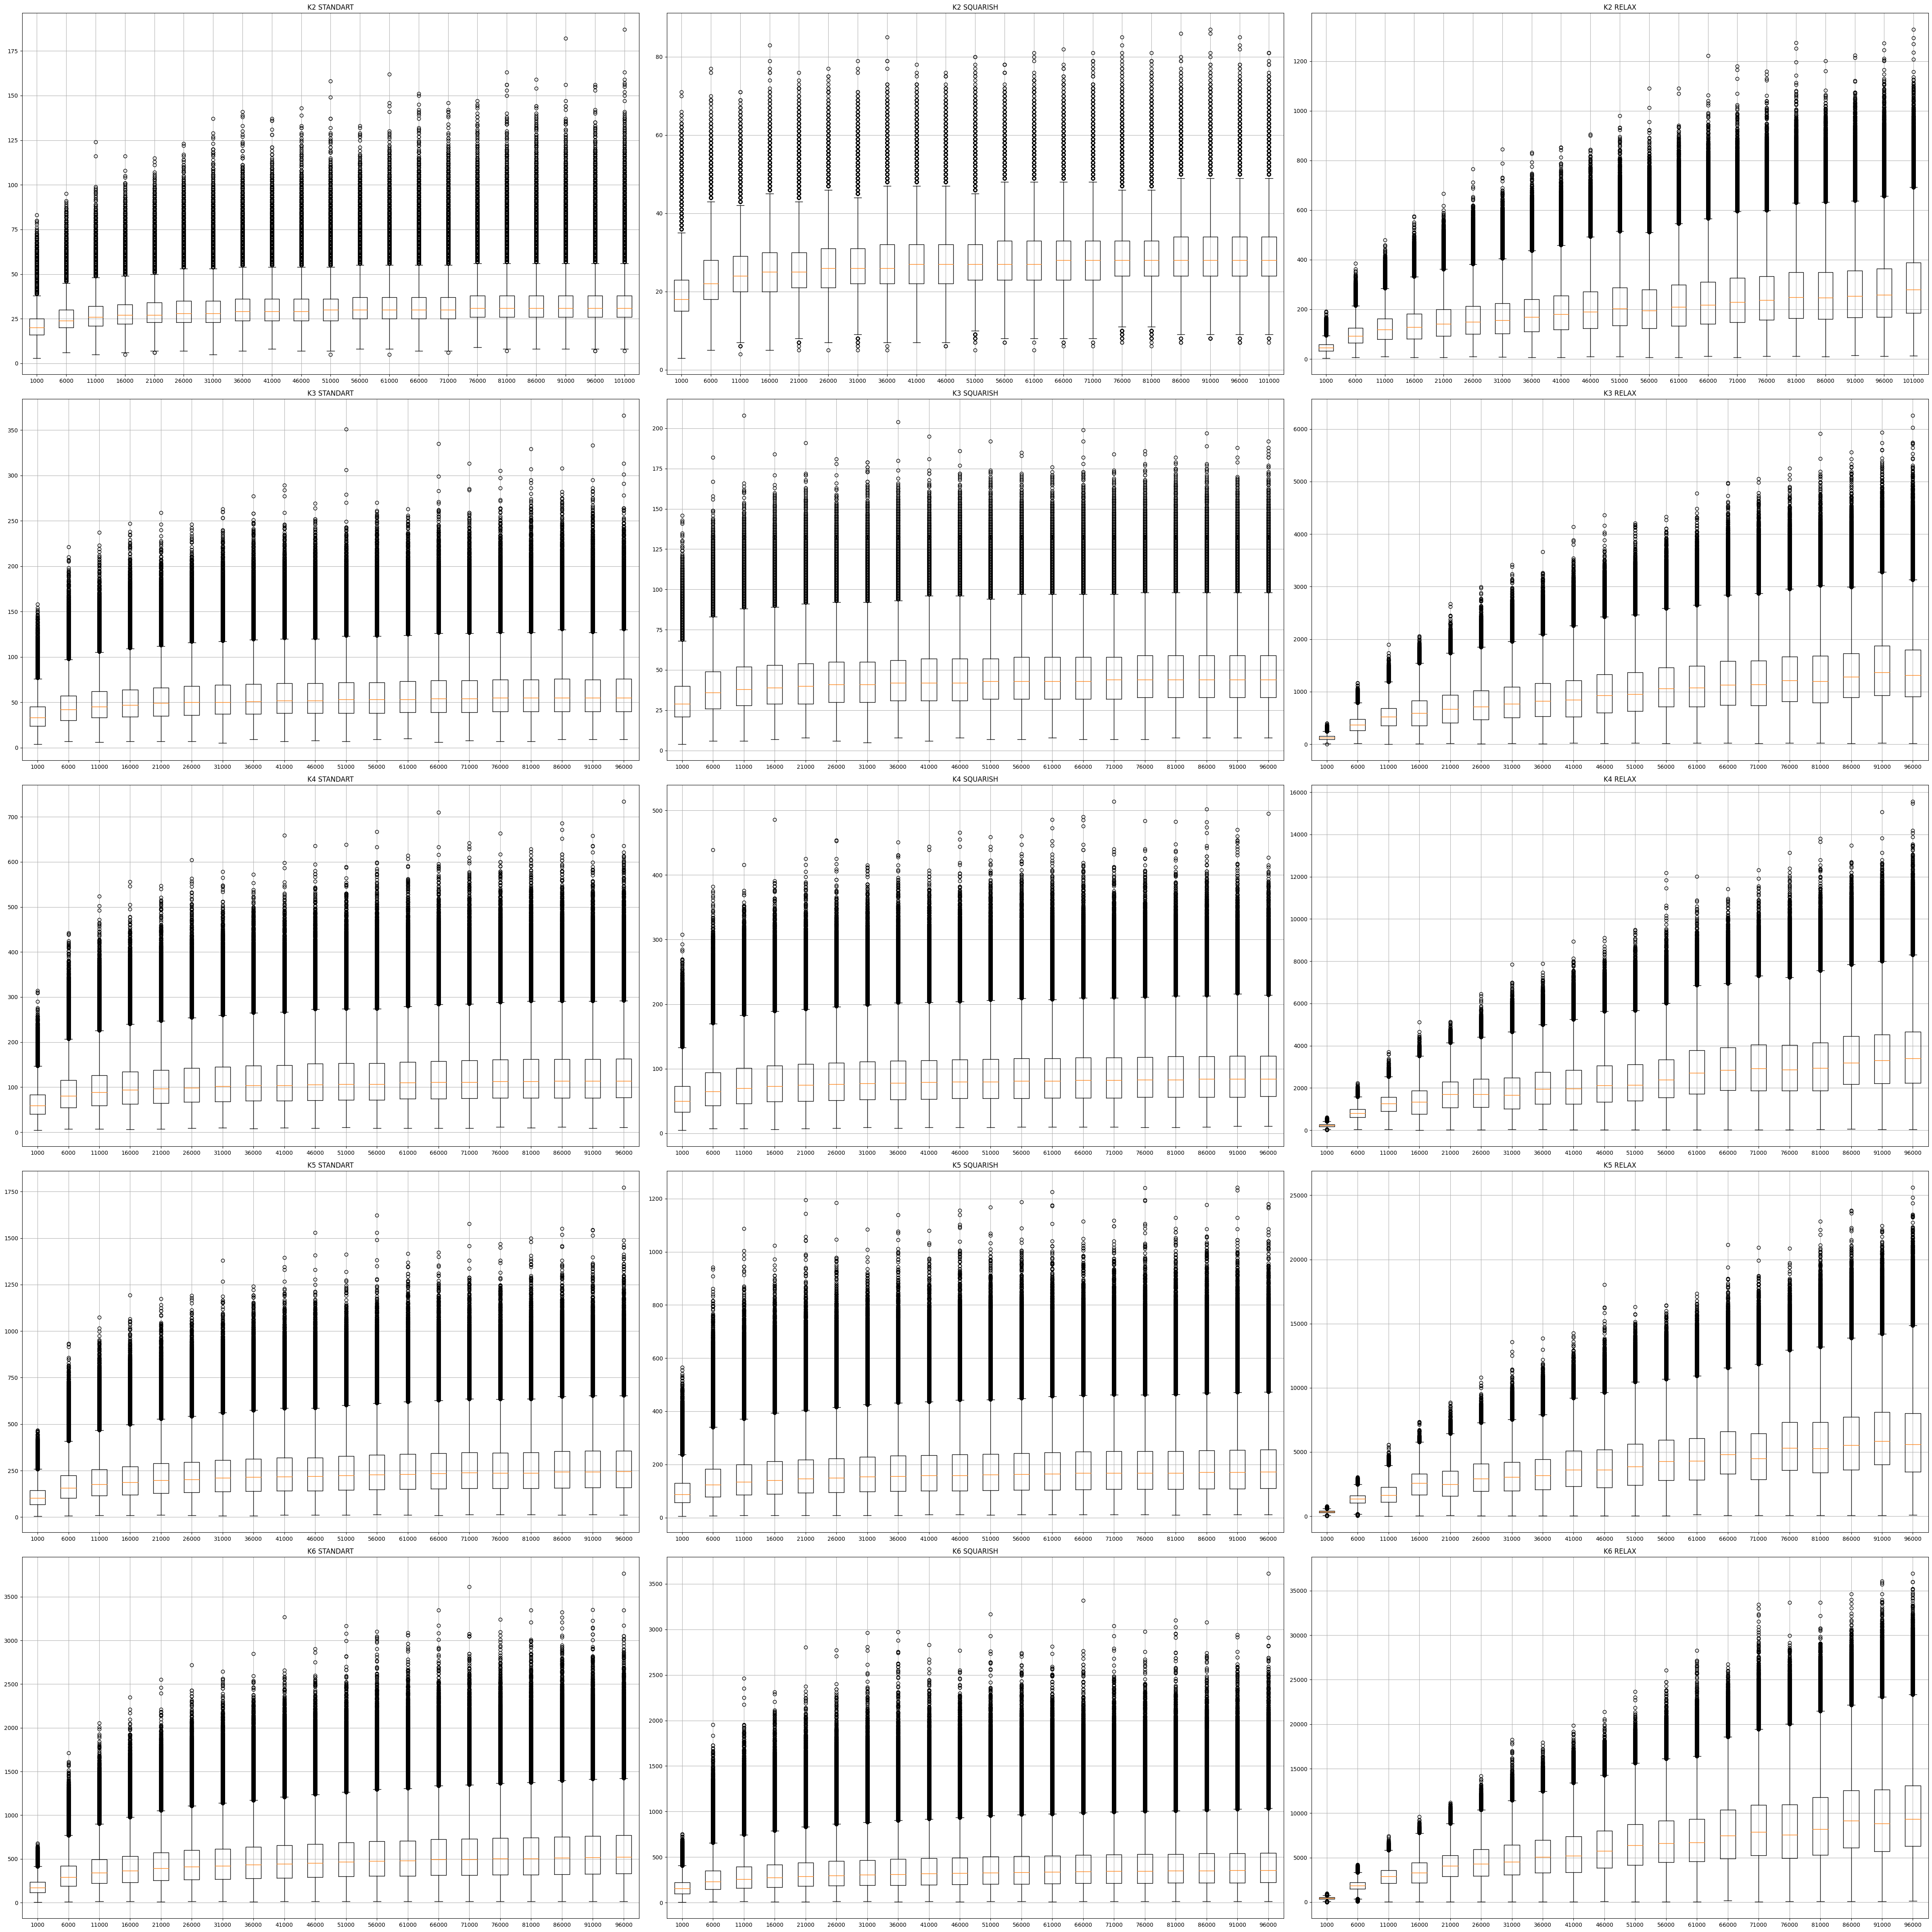

In [4]:
plot_boxplot_log(resultsNodes)


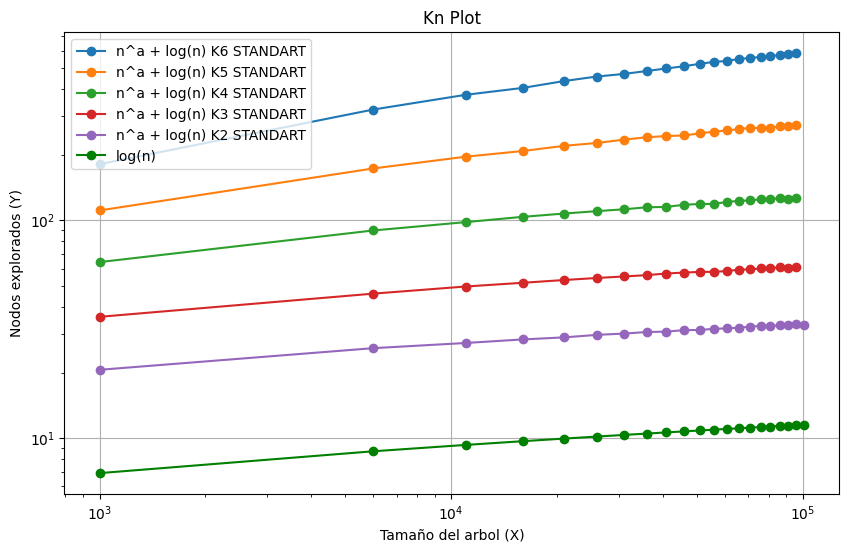

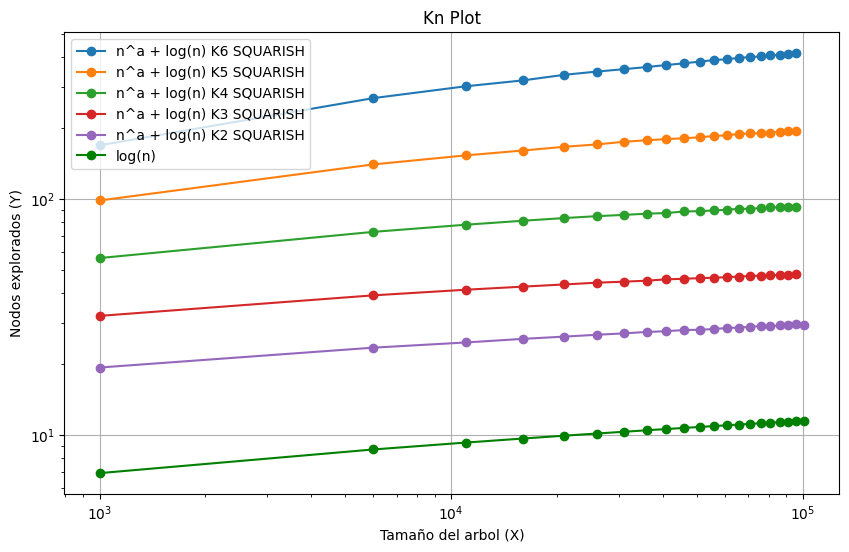

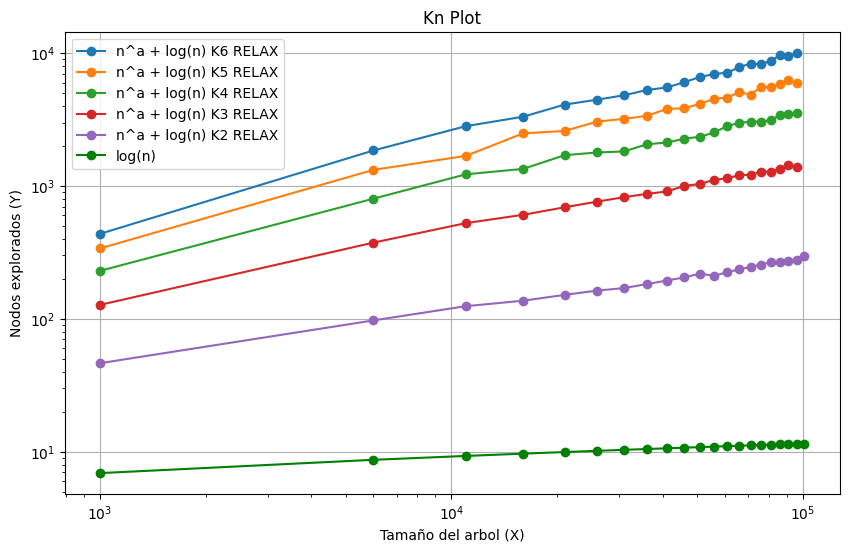

In [46]:
plot_dataframe_log(results, "STANDART")
plot_dataframe_log(results, "SQUARISH")
plot_dataframe_log(results, "RELAX")

## Estimando el alfa

K=2, Método=STANDART
Estimated a: 1.1326505758309851e-08 with cov: 26093451911.56971
Estimated b: 2.8154129881314227 with cov: -26093457242.369797
R^2:0.9973587655163704
R^2 for 1000 nodes: -0.001685782605200803
K=2, Método=SQUARISH
Estimated a: 2.1018738402367636e-08 with cov: 84181447901.40224
Estimated b: 2.502936729380789 with cov: -84181473597.55356
R^2:0.9774179902926995
R^2 for 1000 nodes: -0.02538016544970967
K=2, Método=RELAX
Estimated a: 0.47832370109495614 with cov: 3.981939330261351e-06
Estimated b: 3.335944772793069 with cov: -0.0007095205571394947
R^2:0.9939576173334163
R^2 for 1000 nodes: -0.041085610938166095
K=3, Método=STANDART
Estimated a: 0.1317563520447544 with cov: 0.00019175501109593965
Estimated b: 4.944318184594584 with cov: -0.000784153123760529
R^2:0.9980650034022421
R^2 for 1000 nodes: -0.0014096996870074374
K=3, Método=SQUARISH
Estimated a: 2.070166863592373e-09 with cov: 1242628957826.0017
Estimated b: 4.193537147693965 with cov: -1242629081421.6282
R^2:0.

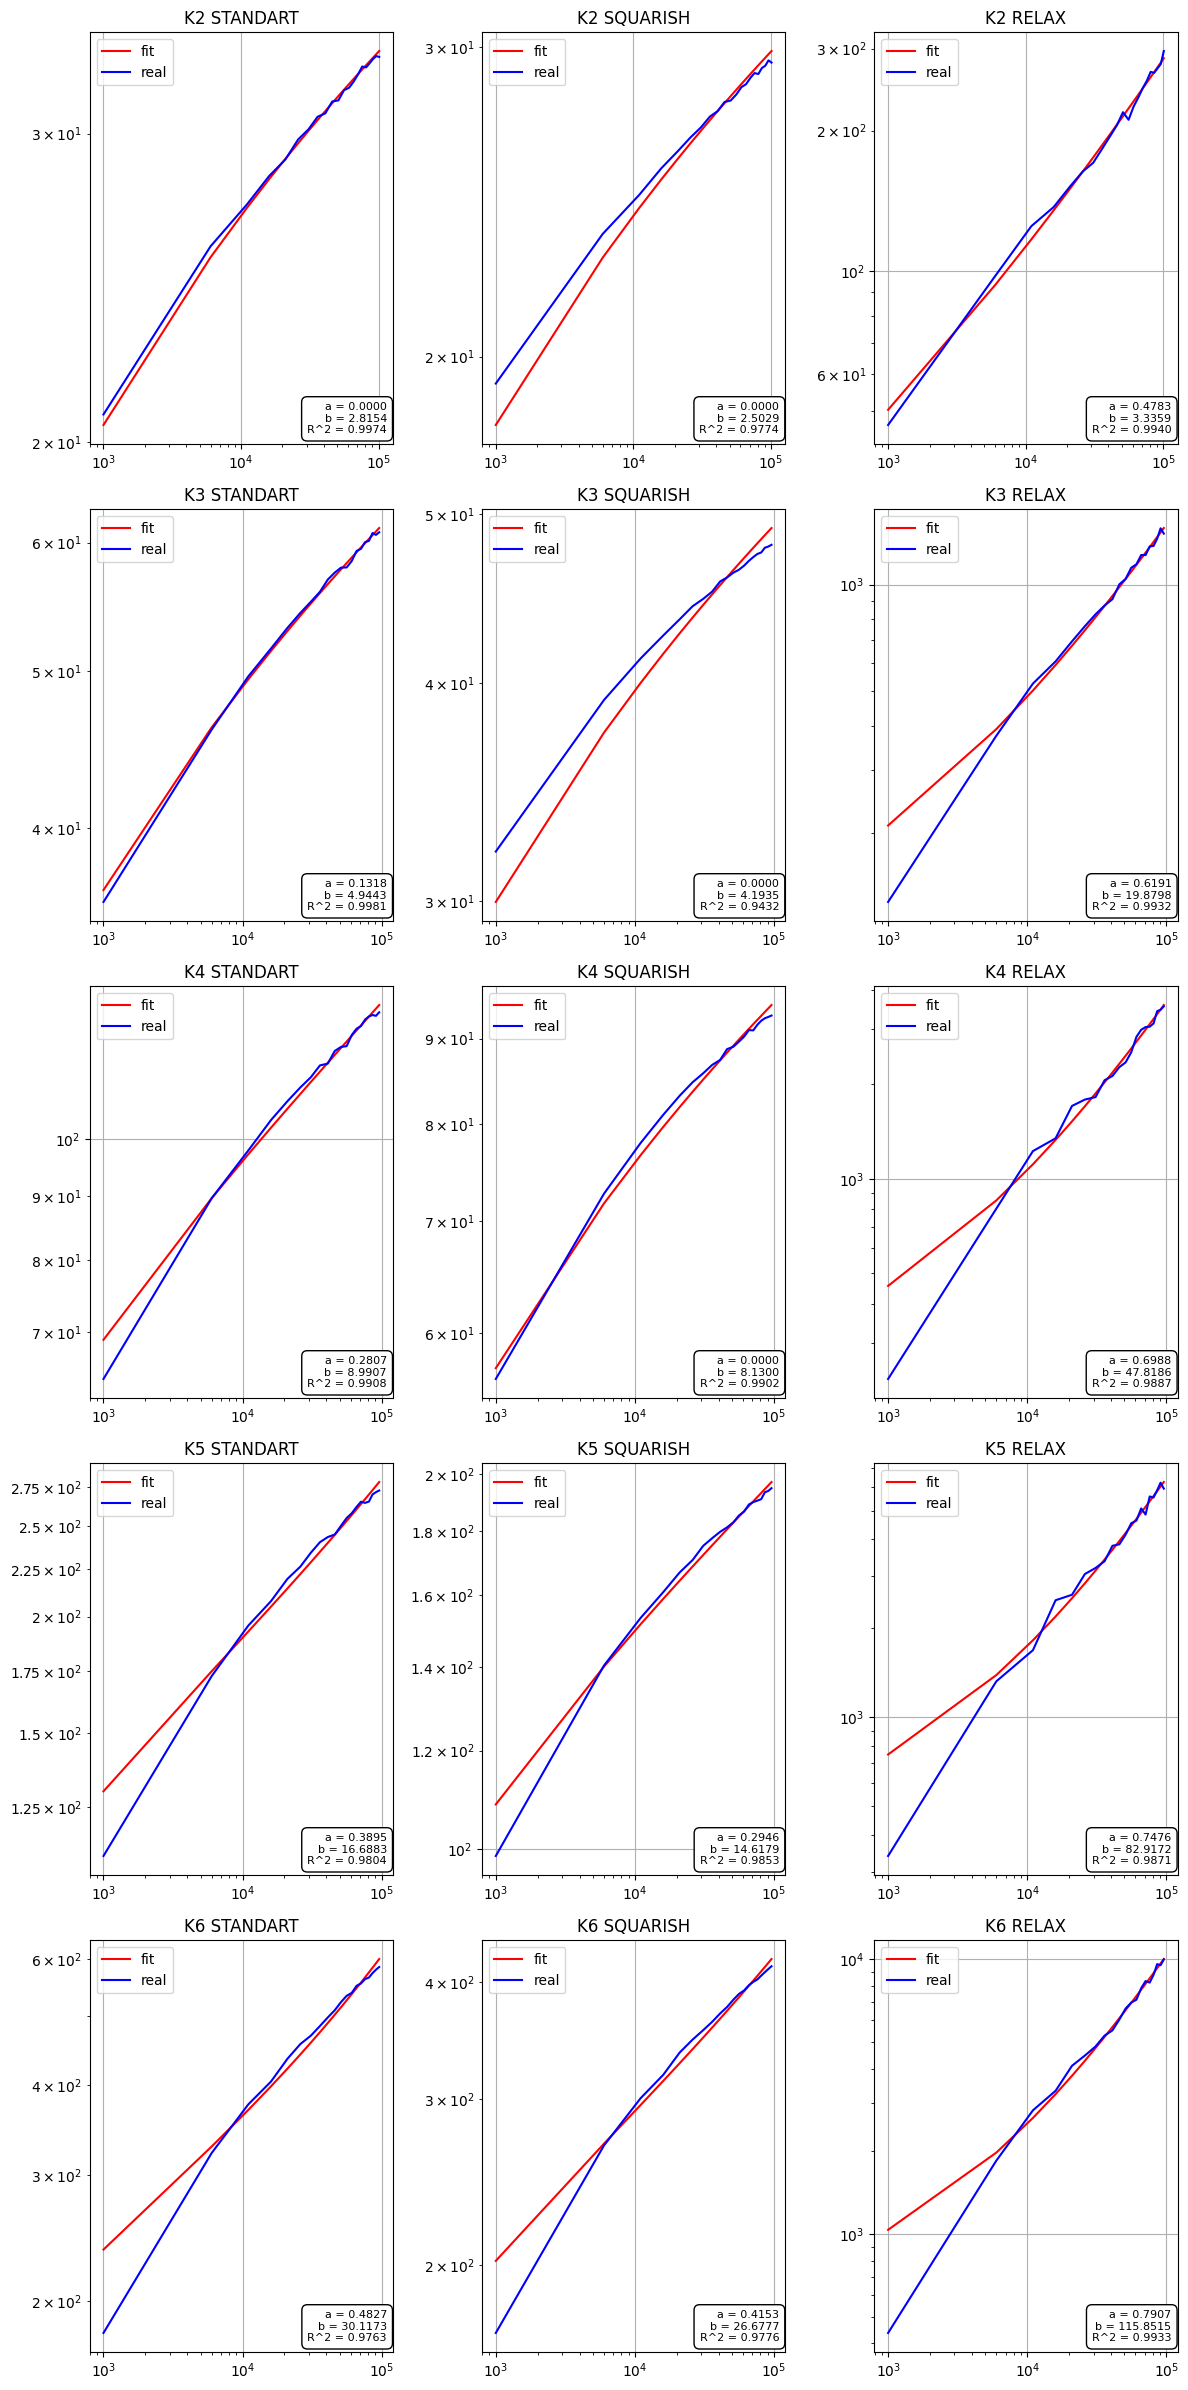

In [33]:
# Función objetivo
def objective_function(n, a,b ):
    return pow(n, a) + b*np.log(n)

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# ... (asumiendo que tienes definida la función objective_function y el diccionario results)

def residualR(X, Y):
    residuals = Y- objective_function(X, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((Y-np.mean(Y))**2)
    return 1 - (ss_res / ss_tot)
# Define la figura y los ejes con 6 filas y 3 columnas
fig, axs = plt.subplots(5, 3, figsize=(12, 24))  # 12 pulgadas de ancho (4 por cada columna) y 24 de alto (4 por cada fila)

for k in range(2, 7):  # Esto nos dará 6 valores: 2, 3, 4, 5, 6, 7
    for i, method in enumerate(["STANDART", "SQUARISH", "RELAX"]):
        popt, pcov = curve_fit(objective_function, results[k][method]['X'], results[k][method]['Y'], bounds=(0, np.inf))
        axs[k-2, i].loglog(results[k][method]['X'], objective_function(results[k][method]['X'], *popt), 'r-', label='fit')
        axs[k-2, i].loglog(results[k][method]['X'], results[k][method]['Y'], linestyle='-', color='blue', label='real')
        r_squared = residualR(results[k][method]['X'], results[k][method]['Y'])
        # ajusta las coordenadas de texto si es necesario
        custom_text = f"a = {popt.item(0):.4f}\nb = {popt.item(1):.4f}\nR^2 = {r_squared:.4f}"  # Puedes ajustar el formato como desees
        axs[k-2, i].text(0.98, 0.02, custom_text, ha='right',fontsize=8, va='bottom', transform=axs[k-2, i].transAxes, 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        
        axs[k-2, i].grid(True)
        axs[k-2, i].legend()
        axs[k-2, i].set_title('K'+str(k) + " " + method)
       
        
        print(f"K={k}, Método={method}")
        print("Estimated a: " + str(popt.item(0)) + " with cov: " + str(pcov.item(0)))
        print("Estimated b: " + str(popt.item(1)) + " with cov: " + str(pcov.item(1)))
        print("R^2:" + str(r_squared))
        print("R^2 for 1000 nodes: " + str(residualR([1000]*len(resultsNodes[k][method][1000]), resultsNodes[k][method][1000])))

# Ajusta el layout después de configurar todos los subplots
fig.tight_layout()

plt.show()




In [26]:
[1000]*len(resultsNodes[k][method][1000])



[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,